In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [2]:
# Creating the data frame
df = pd.read_csv('frmgham2.csv')
df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

In [4]:
df.PERIOD.value_counts()

1    4434
2    3930
3    3263
Name: PERIOD, dtype: int64

In [5]:
df.ANYCHD.value_counts()

0    8469
1    3158
Name: ANYCHD, dtype: int64

In [3]:
df2 = df[["SEX","TOTCHOL", "AGE", "SYSBP", "DIABP", "CURSMOKE", 
                "CIGPDAY", "BMI", "DIABETES", "BPMEDS", "HEARTRTE", "GLUCOSE", "educ",
              "HDLC", "LDLC", "ANYCHD", "PERIOD"]].copy()

In [4]:
df2 = df2[(df2.PERIOD == 3)] 

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3263 entries, 1 to 11626
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       3263 non-null   int64  
 1   TOTCHOL   3049 non-null   float64
 2   AGE       3263 non-null   int64  
 3   SYSBP     3263 non-null   float64
 4   DIABP     3263 non-null   float64
 5   CURSMOKE  3263 non-null   int64  
 6   CIGPDAY   3249 non-null   float64
 7   BMI       3246 non-null   float64
 8   DIABETES  3263 non-null   int64  
 9   BPMEDS    2817 non-null   float64
 10  HEARTRTE  3259 non-null   float64
 11  GLUCOSE   2701 non-null   float64
 12  educ      3181 non-null   float64
 13  HDLC      3027 non-null   float64
 14  LDLC      3026 non-null   float64
 15  ANYCHD    3263 non-null   int64  
 16  PERIOD    3263 non-null   int64  
dtypes: float64(11), int64(6)
memory usage: 458.9 KB


In [5]:
df2 = df2.drop(columns='PERIOD')

In [6]:
df2.shape

(3263, 16)

In [7]:
df2.educ.value_counts()

1.0    1281
2.0     967
3.0     542
4.0     391
Name: educ, dtype: int64

In [61]:
df2.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,HDLC,LDLC,ANYCHD
1,1,209.0,52,121.0,66.0,0,0.0,NaN,0,0.0,69.0,92.0,4.0,31.0,178.0,1
4,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,2.0,54.0,141.0,0
11,2,NaN,58,155.0,90.0,1,30.0,24.61,0,0.0,74.0,NaN,3.0,NaN,NaN,0
14,2,220.0,55,180.0,106.0,0,0.0,31.17,1,1.0,86.0,81.0,2.0,46.0,135.0,1
19,2,320.0,57,110.0,46.0,1,30.0,22.02,0,0.0,75.0,87.0,2.0,34.0,286.0,0


In [12]:
df2.dtypes

SEX           int64
TOTCHOL     float64
AGE           int64
SYSBP       float64
DIABP       float64
CURSMOKE      int64
CIGPDAY     float64
BMI         float64
DIABETES      int64
BPMEDS      float64
HEARTRTE    float64
GLUCOSE     float64
educ        float64
PREVCHD       int64
PREVAP        int64
PREVMI        int64
PREVSTRK      int64
PREVHYP       int64
HDLC        float64
LDLC        float64
ANYCHD        int64
dtype: object

In [8]:
for col in ['SEX','CURSMOKE', 'DIABETES', 'ANYCHD']:
    df2[col] = df2[col].astype('category')

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3263 entries, 1 to 11626
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   SEX       3263 non-null   category
 1   TOTCHOL   3049 non-null   float64 
 2   AGE       3263 non-null   int64   
 3   SYSBP     3263 non-null   float64 
 4   DIABP     3263 non-null   float64 
 5   CURSMOKE  3263 non-null   category
 6   CIGPDAY   3249 non-null   float64 
 7   BMI       3246 non-null   float64 
 8   DIABETES  3263 non-null   category
 9   BPMEDS    2817 non-null   float64 
 10  HEARTRTE  3259 non-null   float64 
 11  GLUCOSE   2701 non-null   float64 
 12  educ      3181 non-null   float64 
 13  HDLC      3027 non-null   float64 
 14  LDLC      3026 non-null   float64 
 15  ANYCHD    3263 non-null   category
dtypes: category(4), float64(11), int64(1)
memory usage: 344.6 KB


In [15]:
df2.isnull().sum()

SEX           0
TOTCHOL     214
AGE           0
SYSBP         0
DIABP         0
CURSMOKE      0
CIGPDAY      14
BMI          17
DIABETES      0
BPMEDS      446
HEARTRTE      4
GLUCOSE     562
educ         82
PREVCHD       0
PREVAP        0
PREVMI        0
PREVSTRK      0
PREVHYP       0
HDLC        236
LDLC        237
ANYCHD        0
dtype: int64

In [16]:
#!pip install missingno
import missingno as msno

<AxesSubplot:>

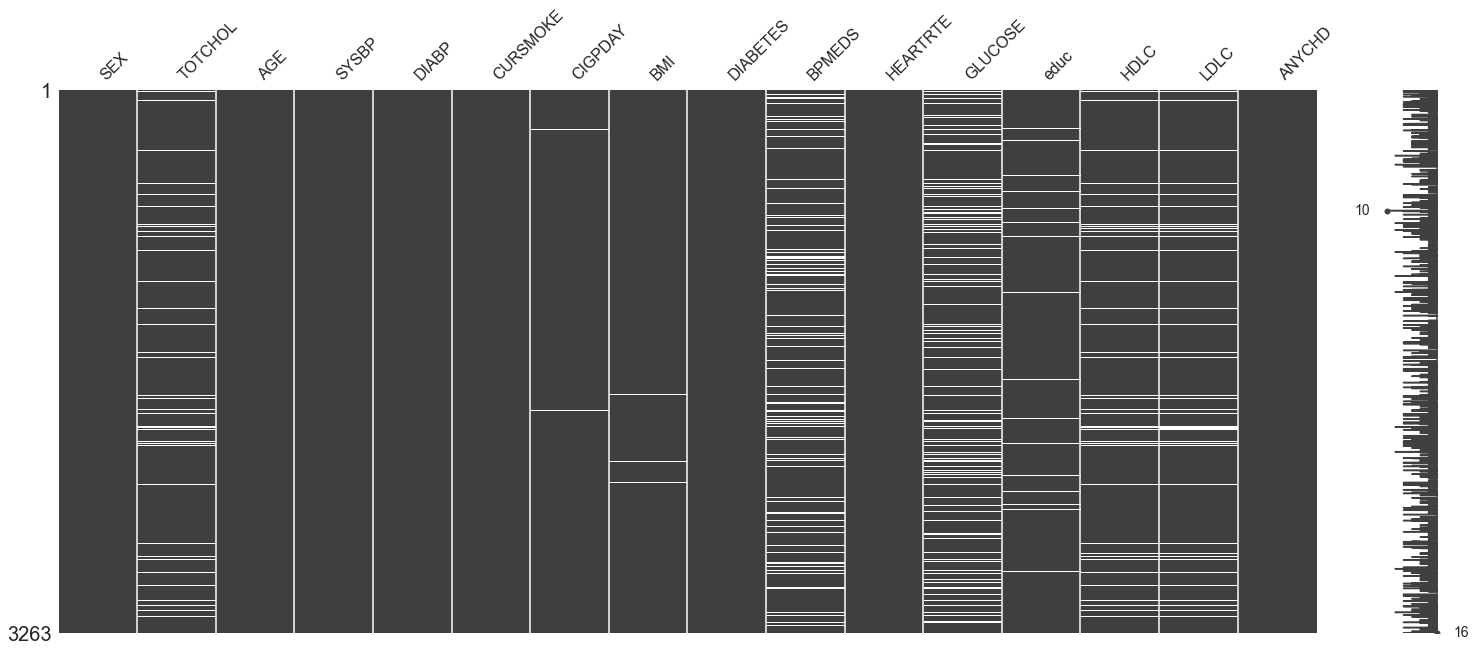

In [67]:
msno.matrix(df2)

<AxesSubplot:>

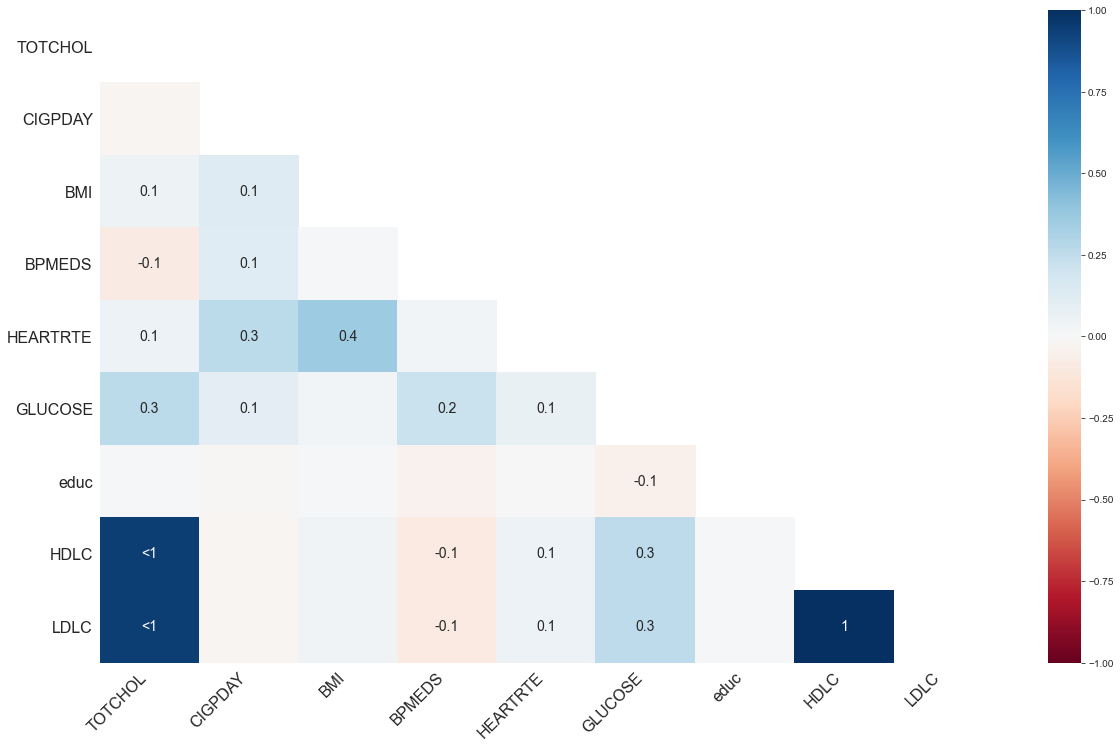

In [65]:
msno.heatmap(df2)

In [66]:
df2.to_csv("working_data.csv")

# TabNet w/o preprocessing

In [9]:
feat = df2.drop('ANYCHD', axis = 1)

In [10]:
# separate our target and features variables
target = np.array(df2['ANYCHD'])
# Remove the target from the features
# axis 1 refers to the columns
features= df2.drop('ANYCHD', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [11]:
from numpy import isnan
from sklearn.impute import KNNImputer
# print total missing
print('Missing: %d' % sum(isnan(features).flatten()))
# define imputer
imputer = KNNImputer(missing_values=np.nan)
# fit on the dataset
imputer.fit(features)
# transform the dataset
features_trans = imputer.transform(features)
# print total missing
print('Missing: %d' % sum(isnan(features_trans).flatten()))

Missing: 1812
Missing: 0


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(features_trans, target, test_size=0.30, random_state=8)

In [13]:
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.50, random_state=8)

In [16]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, balanced_accuracy_score
from sklearn.model_selection import KFold

np.random.seed(8)

In [59]:
clf1_nopreproc = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       n_d = 64, # range 8 - 64 , default = 8
                       n_a = 64, # range 8 - 64 , default = 8         
                       n_steps = 5,
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.5},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

Device used : cpu


In [60]:
clf1_nopreproc.fit(
    x_train,y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy', 'balanced_accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)

epoch 0  | loss: 1.08846 | train_accuracy: 0.56436 | train_balanced_accuracy: 0.53594 | valid_accuracy: 0.52965 | valid_balanced_accuracy: 0.48785 |  0:00:06s
epoch 1  | loss: 0.91604 | train_accuracy: 0.33932 | train_balanced_accuracy: 0.48627 | valid_accuracy: 0.32515 | valid_balanced_accuracy: 0.49957 |  0:00:10s
epoch 2  | loss: 0.74871 | train_accuracy: 0.61384 | train_balanced_accuracy: 0.53522 | valid_accuracy: 0.64826 | valid_balanced_accuracy: 0.58046 |  0:00:16s
epoch 3  | loss: 0.70177 | train_accuracy: 0.56743 | train_balanced_accuracy: 0.5353  | valid_accuracy: 0.60736 | valid_balanced_accuracy: 0.58218 |  0:00:21s
epoch 4  | loss: 0.6379  | train_accuracy: 0.49606 | train_balanced_accuracy: 0.52773 | valid_accuracy: 0.50307 | valid_balanced_accuracy: 0.54906 |  0:00:26s
epoch 5  | loss: 0.64504 | train_accuracy: 0.29729 | train_balanced_accuracy: 0.50233 | valid_accuracy: 0.24131 | valid_balanced_accuracy: 0.47658 |  0:00:31s
epoch 6  | loss: 0.64879 | train_accuracy: 0.2

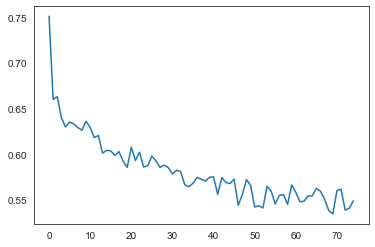

In [53]:
# plot losses
plt.plot(clf1_nopreproc.history['loss'])

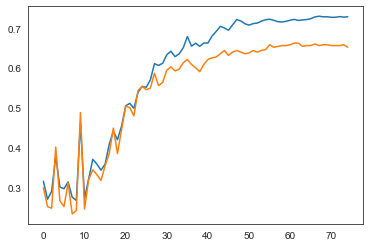

In [54]:
# plot auc
plt.plot(clf1_nopreproc.history['train_accuracy'])
plt.plot(clf1_nopreproc.history['valid_accuracy'])

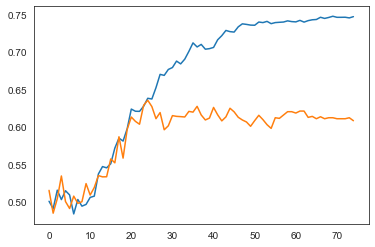

In [55]:
# plot auc
plt.plot(clf1_nopreproc.history['train_balanced_accuracy'])
plt.plot(clf1_nopreproc.history['valid_balanced_accuracy'])

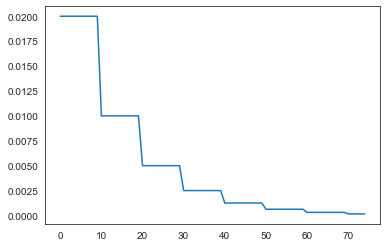

In [56]:
# plot learning rates
plt.plot(clf1_nopreproc.history['lr'])

In [57]:
preds = clf1_nopreproc.predict(x_test)
test_acc = balanced_accuracy_score(preds, y_test)


preds_valid = clf1_nopreproc.predict(x_val)
valid_acc = balanced_accuracy_score(preds_valid, y_val)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

BEST ACCURACY SCORE ON VALIDATION SET : 0.5980573543015726
BEST ACCURACY SCORE ON TEST SET : 0.5823621290400096


In [79]:
y_pred = clf1_nopreproc.predict(x_test)

In [80]:
clf1_nopreproc.feature_importances_

array([0.10864174, 0.04320266, 0.10211497, 0.07570761, 0.09440351,
       0.04869145, 0.07230765, 0.04423008, 0.07430695, 0.0334813 ,
       0.05884564, 0.02934042, 0.03852777, 0.09924656, 0.0769517 ])

<AxesSubplot:>

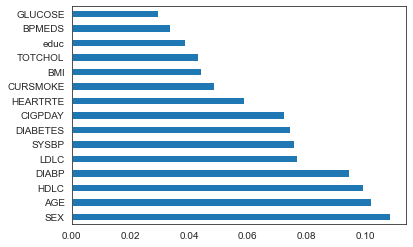

In [81]:
feat_importances = pd.Series(clf1_nopreproc.feature_importances_, index=feat.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [82]:
explain_matrix, masks = clf1_nopreproc.explain(x_test)

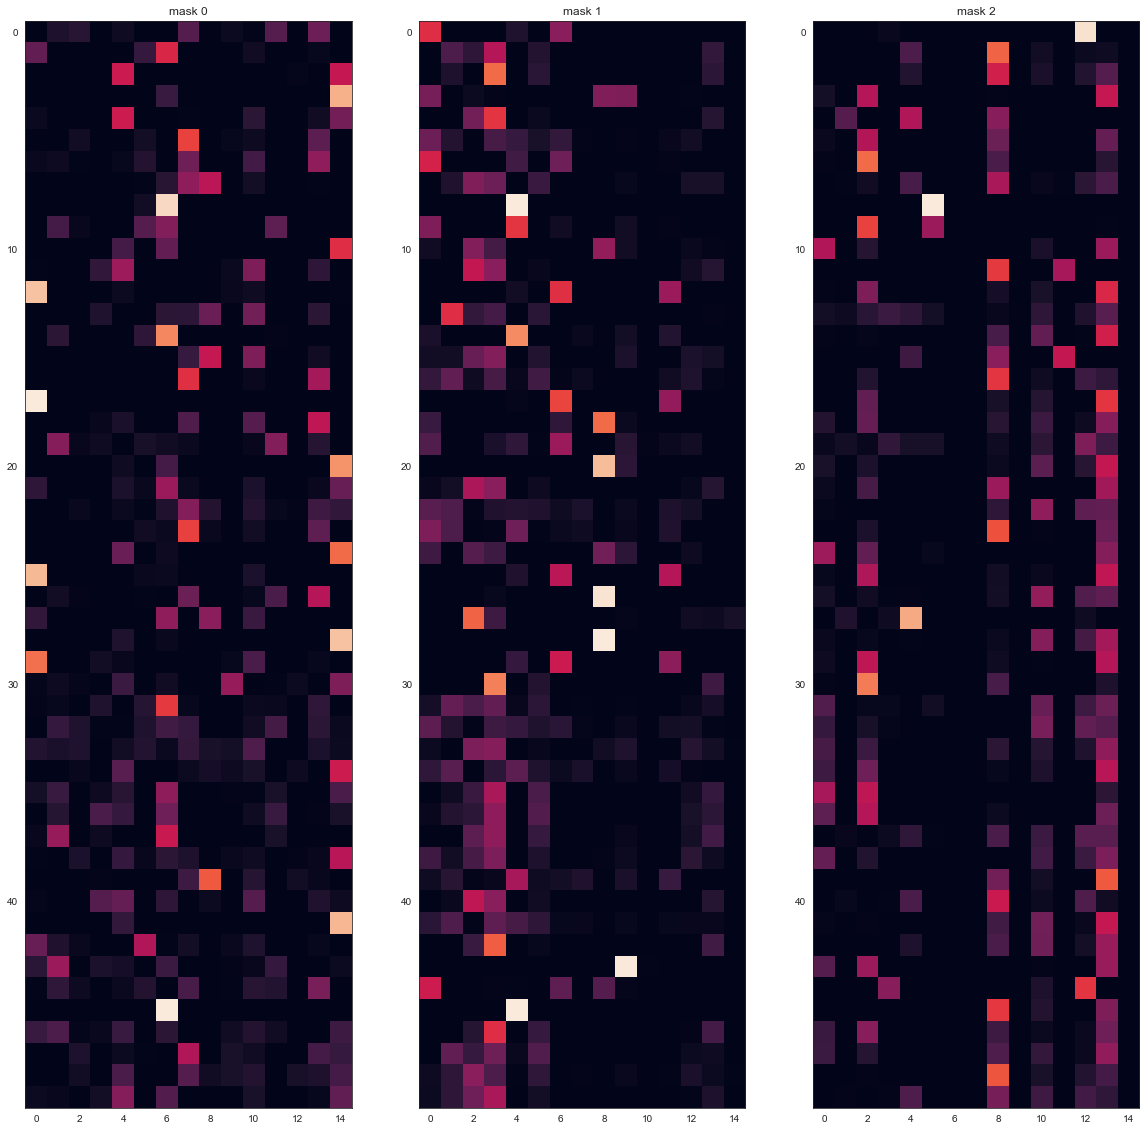

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

# Unsupervised 

In [85]:
from pytorch_tabnet.pretraining import TabNetPretrainer

In [87]:
# TabNetPretrainer
unsupervised_model_no_preproc = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax', # "sparsemax",
    )

Device used : cpu


In [88]:
unsupervised_model_no_preproc.fit(
    x_train,
    eval_set=[x_val],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.8,

)

epoch 0  | loss: 23.27435| val_0_unsup_loss: 151.22362|  0:00:00s
epoch 1  | loss: 20.29935| val_0_unsup_loss: 33.85955|  0:00:01s
epoch 2  | loss: 19.41276| val_0_unsup_loss: 23.74484|  0:00:02s
epoch 3  | loss: 17.74955| val_0_unsup_loss: 16.59229|  0:00:03s
epoch 4  | loss: 14.71082| val_0_unsup_loss: 13.7693 |  0:00:04s
epoch 5  | loss: 10.61084| val_0_unsup_loss: 12.52599|  0:00:04s
epoch 6  | loss: 7.10216 | val_0_unsup_loss: 9.03843 |  0:00:06s
epoch 7  | loss: 4.95334 | val_0_unsup_loss: 6.0489  |  0:00:07s
epoch 8  | loss: 3.59172 | val_0_unsup_loss: 5.01185 |  0:00:08s
epoch 9  | loss: 2.86268 | val_0_unsup_loss: 3.64372 |  0:00:08s
epoch 10 | loss: 2.33289 | val_0_unsup_loss: 3.39957 |  0:00:09s
epoch 11 | loss: 1.97783 | val_0_unsup_loss: 3.08665 |  0:00:10s
epoch 12 | loss: 1.7983  | val_0_unsup_loss: 2.84648 |  0:00:11s
epoch 13 | loss: 1.60027 | val_0_unsup_loss: 3.05919 |  0:00:11s
epoch 14 | loss: 1.45861 | val_0_unsup_loss: 2.5633  |  0:00:12s
epoch 15 | loss: 1.35965

In [89]:
# Make reconstruction from a dataset
reconstructed_X, embedded_X = unsupervised_model_no_preproc.predict(x_val)
assert(reconstructed_X.shape==embedded_X.shape)

In [90]:
unsupervised_explain_matrix, unsupervised_masks = unsupervised_model_no_preproc.explain(x_val)

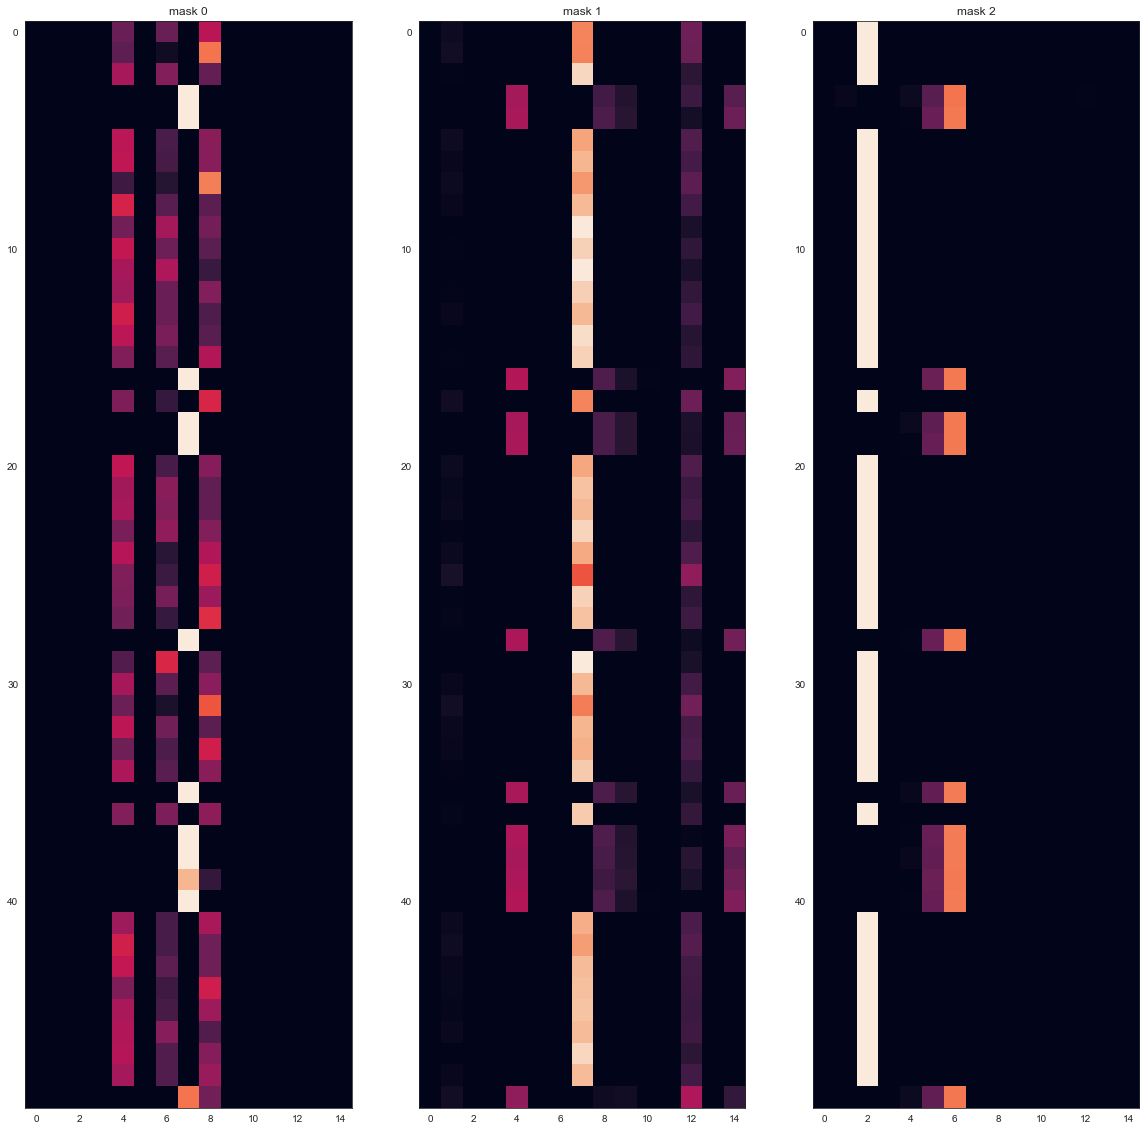

In [91]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(unsupervised_masks[i][:50])
    axs[i].set_title(f"mask {i}")

In [92]:
unsupervised_model_no_preproc.save_model('./test_pretrain2')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain2.zip')

Successfully saved model at ./test_pretrain2.zip
Device used : cpu
Device used : cpu


In [93]:
clf2_no_preproc = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # This will be overwritten if using pretrain model
                      )

Device used : cpu


In [94]:
clf2_no_preproc.fit(
    x_train, y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    from_unsupervised=loaded_pretrain
    
)

C:\Users\Ryan\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:97: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)


Loading weights from unsupervised pretraining
epoch 0  | loss: 1.27347 | train_auc: 0.58612 | train_accuracy: 0.26095 | valid_auc: 0.62191 | valid_accuracy: 0.22904 |  0:00:00s
epoch 1  | loss: 0.81177 | train_auc: 0.57721 | train_accuracy: 0.2627  | valid_auc: 0.55594 | valid_accuracy: 0.22904 |  0:00:01s
epoch 2  | loss: 0.73665 | train_auc: 0.49455 | train_accuracy: 0.73205 | valid_auc: 0.51748 | valid_accuracy: 0.76483 |  0:00:02s
epoch 3  | loss: 0.6863  | train_auc: 0.57742 | train_accuracy: 0.56217 | valid_auc: 0.59701 | valid_accuracy: 0.58078 |  0:00:03s
epoch 4  | loss: 0.67845 | train_auc: 0.57882 | train_accuracy: 0.28984 | valid_auc: 0.58685 | valid_accuracy: 0.26176 |  0:00:04s
epoch 5  | loss: 0.66405 | train_auc: 0.58292 | train_accuracy: 0.28809 | valid_auc: 0.60656 | valid_accuracy: 0.24744 |  0:00:06s
epoch 6  | loss: 0.66605 | train_auc: 0.59883 | train_accuracy: 0.33713 | valid_auc: 0.63791 | valid_accuracy: 0.30879 |  0:00:07s
epoch 7  | loss: 0.68734 | train_auc:

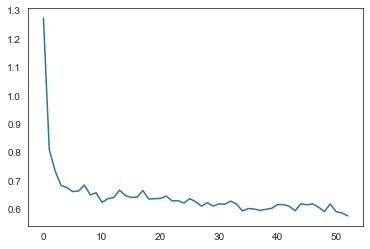

In [95]:
# plot losses
plt.plot(clf2_no_preproc.history['loss'])

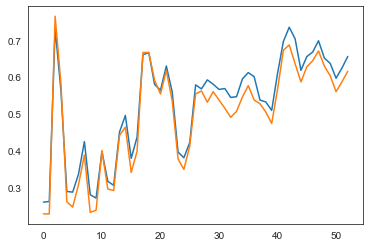

In [96]:
# plot auc
plt.plot(clf2_no_preproc.history['train_accuracy'])
plt.plot(clf2_no_preproc.history['valid_accuracy'])

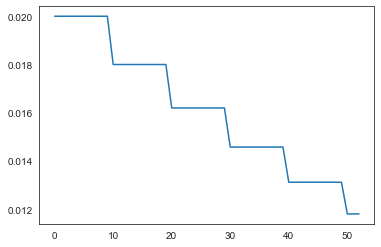

In [97]:
# plot learning rates
plt.plot(clf2_no_preproc.history['lr'])

In [98]:
preds = clf2_no_preproc.predict(x_test)
test_acc = accuracy_score(preds, y_test)


preds_valid = clf2_no_preproc.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

BEST ACCURACY SCORE ON VALIDATION SET : 0.7648261758691206
BEST ACCURACY SCORE ON TEST SET : 0.710204081632653


In [99]:
clf2_no_preproc.feature_importances_

array([0.        , 0.00255817, 0.00191685, 0.        , 0.22020766,
       0.01729154, 0.28529521, 0.35535531, 0.01126078, 0.        ,
       0.05636882, 0.        , 0.01357883, 0.        , 0.03616683])

<AxesSubplot:>

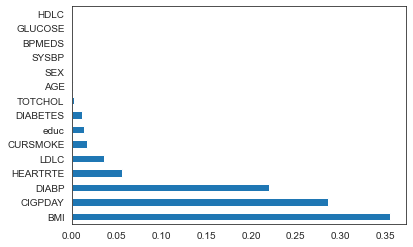

In [100]:
feat_importances = pd.Series(clf2_no_preproc.feature_importances_, index=feat.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [195]:
explain_matrix, masks = clf2_no_preproc.explain(x_test)

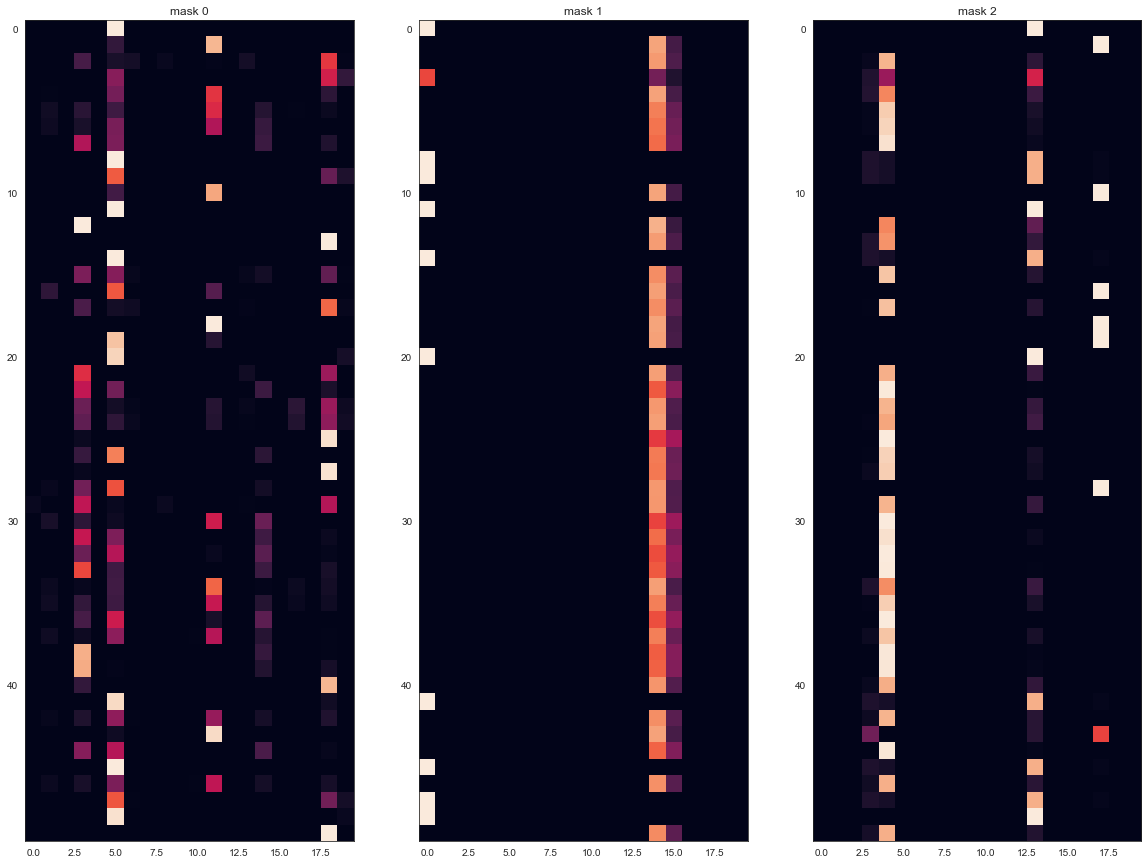

In [196]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

In [166]:
df3 = df2.copy()

# TabNet with preprocessing

In [91]:
from sklearn.preprocessing import LabelEncoder

categ = ['SEX','CURSMOKE', 'DIABETES', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'ANYCHD']

# Encode Categorical Columns
le = LabelEncoder()
df3[categ] = df3[categ].apply(le.fit_transform)

In [92]:
from sklearn.preprocessing import StandardScaler

numeric = ['TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 
           'educ', 'HDLC', 'LDLC' ]
features = df3[numeric]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
standardized = scaler.transform(features.values)
inversed = scaler.inverse_transform(standardized)

df3[numeric] = standardized


In [101]:
df3.head(20)

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,...,GLUCOSE,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,HDLC,LDLC,ANYCHD
1,0,-0.623582,-1.042515,-0.838233,-1.401366,0,-0.582363,NaN,0,-0.423849,...,0.079021,1.925290,0,0,0,0,0,-1.175411,0.032719,1
4,1,0.006450,-0.319231,-1.405321,-1.401366,0,-0.582363,0.638530,0,-0.423849,...,-0.666886,-0.013101,0,0,0,0,0,0.296675,-0.756941,0
11,1,NaN,-0.319231,0.644921,0.728237,1,1.997652,-0.314895,0,-0.423849,...,NaN,0.956094,0,0,0,0,1,NaN,NaN,0
14,1,-0.376069,-0.680873,1.735475,2.147973,0,-0.582363,1.292937,1,2.359329,...,-0.311692,-0.013101,0,0,0,0,1,-0.215355,-0.884994,1
19,1,1.874045,-0.439778,-1.318076,-3.176035,1,1.997652,-0.949695,0,-0.423849,...,-0.098576,-0.013101,0,0,0,0,0,-0.983399,2.337670,0
22,0,0.973999,0.404053,1.212009,1.615572,0,-0.582363,-0.042838,0,-0.423849,...,-0.276173,-0.982297,0,0,0,0,1,-0.343362,1.270563,0
25,0,-0.578580,-0.680873,1.430120,3.656442,0,-0.582363,0.788039,0,2.359329,...,-0.169615,-0.982297,0,0,0,0,1,-0.087347,-0.287414,0
28,1,1.221512,0.162959,-0.881855,-1.046432,0,-0.582363,-0.959499,0,NaN,...,-0.240653,-0.982297,0,0,0,0,0,0.680698,0.865062,0
34,1,-1.748639,-0.921967,-0.707366,-0.336564,0,-0.582363,0.177749,0,-0.423849,...,1.606354,0.956094,0,0,0,0,1,0.232672,-1.503916,0
37,1,0.613981,-1.163062,0.034211,-0.070364,1,0.707645,-0.275680,0,-0.423849,...,0.256618,-0.013101,0,0,0,0,1,0.552690,0.630299,0


In [111]:
train = df3.copy()

In [112]:
# Labels are the values we want to predict
target = np.array(train['ANYCHD'])
# Remove the labels from the features
# axis 1 refers to the columns
features= train.drop('ANYCHD', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [114]:
from numpy import isnan
from sklearn.impute import KNNImputer
# print total missing
print('Missing: %d' % sum(isnan(features).flatten()))
# define imputer
imputer = KNNImputer(missing_values=np.nan)
# fit on the dataset
imputer.fit(features)
# transform the dataset
features_trans = imputer.transform(features)
# print total missing
print('Missing: %d' % sum(isnan(features_trans).flatten()))

Missing: 1812
Missing: 0


In [115]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(features_trans, target, test_size=0.30, random_state=8)

In [116]:
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.50, random_state=8)

In [117]:
print("X train shape: ", x_train.shape)
print("X validation shape: ", x_val.shape)
print("X test shape: ", x_test.shape)
print("Y train shape: ", y_train.shape)
print("Y validation shape: ", y_val.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (2284, 20)
X validation shape:  (489, 20)
X test shape:  (490, 20)
Y train shape:  (2284,)
Y validation shape:  (489,)
Y test shape:  (490,)


In [86]:
import pytorch_tabnet

In [150]:
from pytorch_tabnet.tab_model import TabNetClassifier

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import KFold

np.random.seed(8)

In [118]:
import imblearn
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=8)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 596
Before OverSampling, counts of label '0': 1688 

After OverSampling, the shape of train_X: (3376, 20)
After OverSampling, the shape of train_y: (3376,) 

After OverSampling, counts of label '1': 1688
After OverSampling, counts of label '0': 1688


In [119]:
clf1 = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":50, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

Device used : cpu


In [120]:
clf1.fit(
    x_train,y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['auc','accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)

epoch 0  | loss: 0.67772 | train_auc: 0.68004 | train_accuracy: 0.53678 | valid_auc: 0.64317 | valid_accuracy: 0.52352 |  0:00:00s
epoch 1  | loss: 0.58694 | train_auc: 0.75352 | train_accuracy: 0.79904 | valid_auc: 0.71078 | valid_accuracy: 0.81595 |  0:00:01s
epoch 2  | loss: 0.53315 | train_auc: 0.7772  | train_accuracy: 0.81261 | valid_auc: 0.72783 | valid_accuracy: 0.82004 |  0:00:02s
epoch 3  | loss: 0.51794 | train_auc: 0.78575 | train_accuracy: 0.82531 | valid_auc: 0.74739 | valid_accuracy: 0.8364  |  0:00:03s
epoch 4  | loss: 0.49393 | train_auc: 0.77239 | train_accuracy: 0.80911 | valid_auc: 0.74616 | valid_accuracy: 0.82413 |  0:00:04s
epoch 5  | loss: 0.48386 | train_auc: 0.79496 | train_accuracy: 0.83363 | valid_auc: 0.76835 | valid_accuracy: 0.84458 |  0:00:05s
epoch 6  | loss: 0.49347 | train_auc: 0.7908  | train_accuracy: 0.80998 | valid_auc: 0.76078 | valid_accuracy: 0.82209 |  0:00:06s
epoch 7  | loss: 0.49318 | train_auc: 0.79815 | train_accuracy: 0.80648 | valid_auc

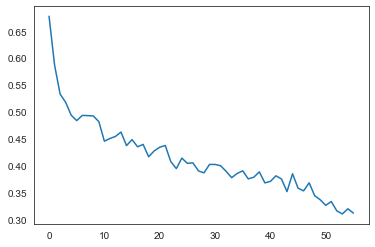

In [121]:
# plot losses
plt.plot(clf1.history['loss'])

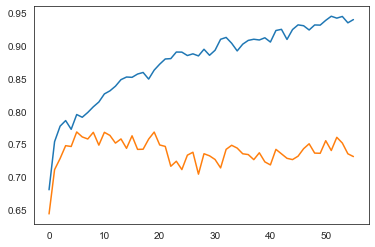

In [122]:
# plot auc
plt.plot(clf1.history['train_auc'])
plt.plot(clf1.history['valid_auc'])

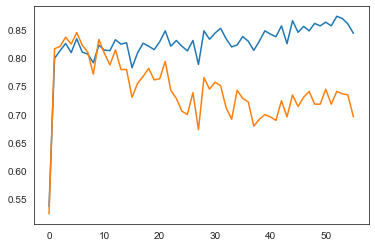

In [143]:
# plot auc
plt.plot(clf1.history['train_accuracy'])
plt.plot(clf1.history['valid_accuracy'])

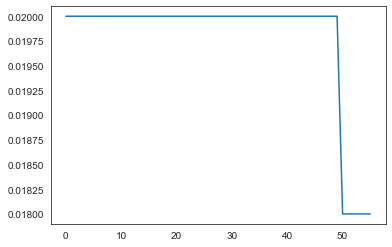

In [123]:
# plot learning rates
plt.plot(clf1.history['lr'])

In [124]:
preds = clf1.predict_proba(x_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)


preds_valid = clf1.predict_proba(x_val)
valid_auc = roc_auc_score(y_score=preds_valid[:,1], y_true=y_val)

print(f"BEST VALID SCORE FOR THIS SET : {clf1.best_cost}")
print(f"FINAL TEST SCORE FOR THIS SET : {test_auc}")

BEST VALID SCORE FOR THIS SET : 0.8445807770961146
FINAL TEST SCORE FOR THIS SET : 0.7787206132529874


In [159]:
preds = clf1.predict(x_test)
test_acc = accuracy_score(preds, y_test)


preds_valid = clf1.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

BEST ACCURACY SCORE ON VALIDATION SET : 0.8445807770961146
BEST ACCURACY SCORE ON TEST SET : 0.8183673469387756


In [ ]:
# check that best weights are used
assert np.isclose(valid_auc, np.max(clf1.history['valid_auc']), atol=1e-6)

In [125]:
y_pred = clf1.predict(x_test)

In [126]:
clf1.feature_importances_

array([0.05758596, 0.06925715, 0.04699321, 0.04336625, 0.02433202,
       0.01860883, 0.00455365, 0.01661093, 0.00973072, 0.00383943,
       0.0265288 , 0.0146363 , 0.00718994, 0.15064551, 0.3801657 ,
       0.03707393, 0.01493747, 0.0378262 , 0.00247997, 0.03363802])

In [127]:
explain_matrix, masks = clf1.explain(x_test)

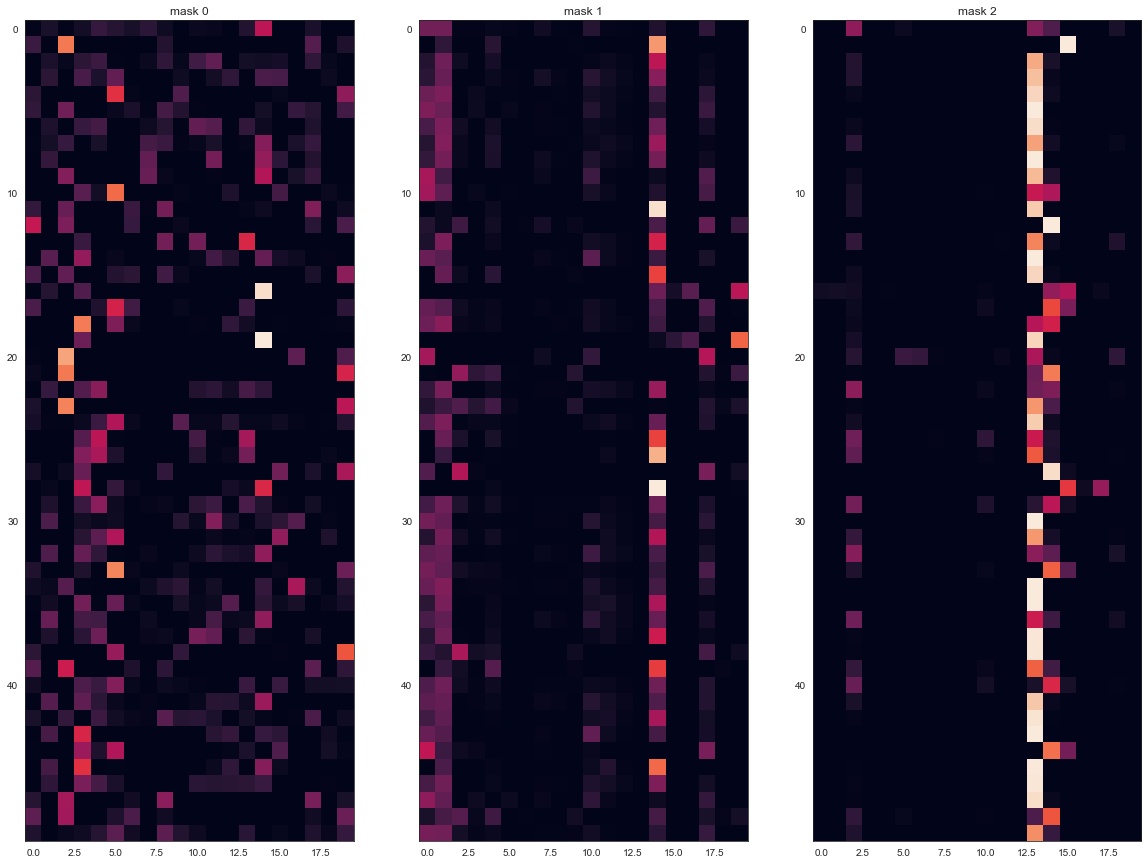

In [128]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

In [129]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[337,  14],
       [ 75,  64]], dtype=int64)

# Unsupervised Tabnet

In [131]:
from pytorch_tabnet.pretraining import TabNetPretrainer

In [132]:
# TabNetPretrainer
unsupervised_model = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax', # "sparsemax",
    #n_shared_decoder=1, # nb shared glu for decoding
    #n_indep_decoder=1, # nb independent glu for decoding
)

Device used : cpu


In [133]:
unsupervised_model.fit(
    x_train,
    eval_set=[x_val],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.8,

)

epoch 0  | loss: 5.34737 | val_0_unsup_loss: 1.42451 |  0:00:01s
epoch 1  | loss: 1.6799  | val_0_unsup_loss: 1.16788 |  0:00:02s
epoch 2  | loss: 1.16748 | val_0_unsup_loss: 1.134   |  0:00:04s
epoch 3  | loss: 1.06895 | val_0_unsup_loss: 1.09998 |  0:00:06s
epoch 4  | loss: 1.03868 | val_0_unsup_loss: 1.07285 |  0:00:07s
epoch 5  | loss: 1.02801 | val_0_unsup_loss: 1.04224 |  0:00:09s
epoch 6  | loss: 1.00839 | val_0_unsup_loss: 1.03399 |  0:00:11s
epoch 7  | loss: 0.99228 | val_0_unsup_loss: 0.9981  |  0:00:12s
epoch 8  | loss: 1.01007 | val_0_unsup_loss: 0.97959 |  0:00:15s
epoch 9  | loss: 4492.3747| val_0_unsup_loss: 0.98103 |  0:00:16s
epoch 10 | loss: 0.9975  | val_0_unsup_loss: 0.96291 |  0:00:17s
epoch 11 | loss: 0.98667 | val_0_unsup_loss: 0.9609  |  0:00:19s
epoch 12 | loss: 0.97941 | val_0_unsup_loss: 0.951   |  0:00:20s
epoch 13 | loss: 0.97447 | val_0_unsup_loss: 0.94539 |  0:00:21s
epoch 14 | loss: 0.98115 | val_0_unsup_loss: 0.94276 |  0:00:23s
epoch 15 | loss: 0.9764 

In [134]:
# Make reconstruction from a dataset
reconstructed_X, embedded_X = unsupervised_model.predict(x_val)
assert(reconstructed_X.shape==embedded_X.shape)

In [135]:
unsupervised_explain_matrix, unsupervised_masks = unsupervised_model.explain(x_val)

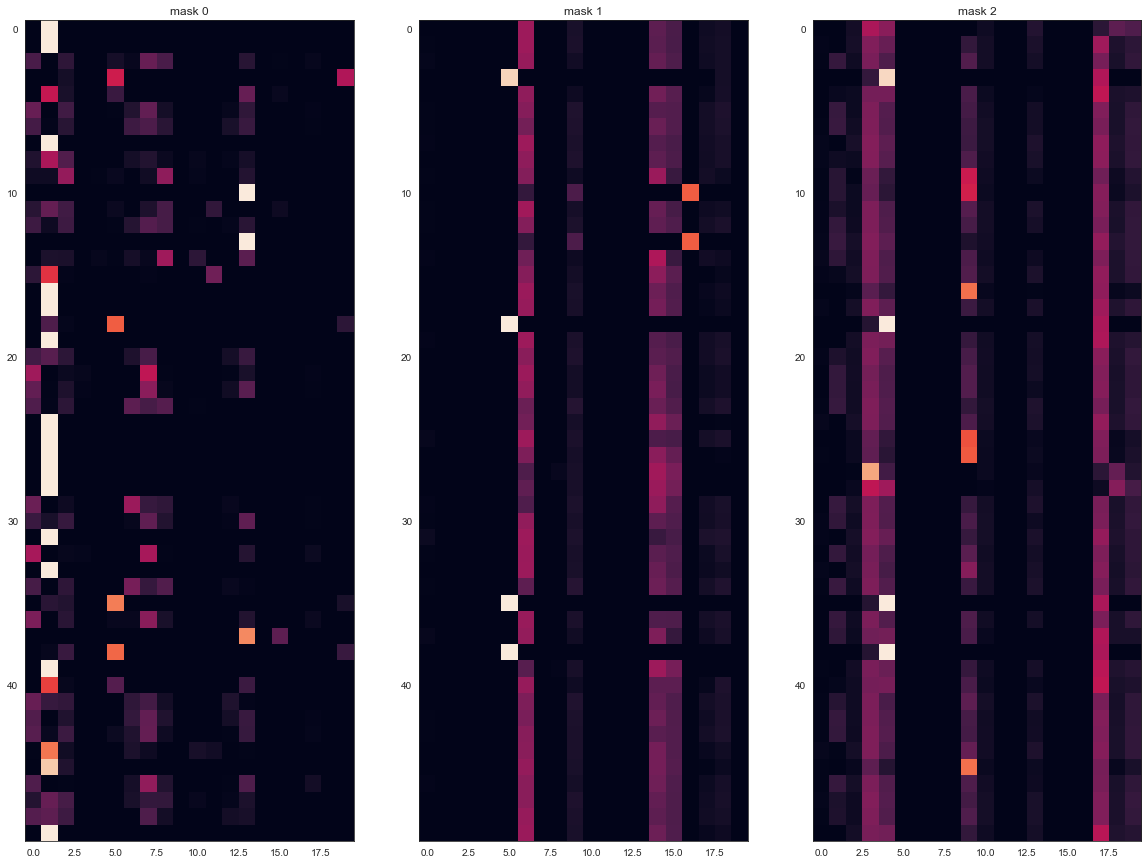

In [136]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(unsupervised_masks[i][:50])
    axs[i].set_title(f"mask {i}")

In [137]:
unsupervised_model.save_model('./test_pretrain')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain.zip')

Successfully saved model at ./test_pretrain.zip
Device used : cpu
Device used : cpu


In [138]:
clf2 = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # This will be overwritten if using pretrain model
                      )

Device used : cpu


In [139]:
clf2.fit(
    x_train, y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    from_unsupervised=loaded_pretrain
    
)

C:\Users\Ryan\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:97: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)


Loading weights from unsupervised pretraining
epoch 0  | loss: 0.65307 | train_auc: 0.76633 | train_accuracy: 0.79947 | valid_auc: 0.7491  | valid_accuracy: 0.80573 |  0:00:00s
epoch 1  | loss: 0.53346 | train_auc: 0.77326 | train_accuracy: 0.71454 | valid_auc: 0.76772 | valid_accuracy: 0.71166 |  0:00:01s
epoch 2  | loss: 0.48578 | train_auc: 0.78482 | train_accuracy: 0.59151 | valid_auc: 0.77743 | valid_accuracy: 0.58078 |  0:00:02s
epoch 3  | loss: 0.4888  | train_auc: 0.79643 | train_accuracy: 0.63573 | valid_auc: 0.78785 | valid_accuracy: 0.66258 |  0:00:03s
epoch 4  | loss: 0.46891 | train_auc: 0.80103 | train_accuracy: 0.66813 | valid_auc: 0.79403 | valid_accuracy: 0.6953  |  0:00:04s
epoch 5  | loss: 0.47397 | train_auc: 0.80618 | train_accuracy: 0.71541 | valid_auc: 0.80294 | valid_accuracy: 0.72802 |  0:00:05s
epoch 6  | loss: 0.46732 | train_auc: 0.8192  | train_accuracy: 0.68608 | valid_auc: 0.79857 | valid_accuracy: 0.69121 |  0:00:06s
epoch 7  | loss: 0.46803 | train_auc:

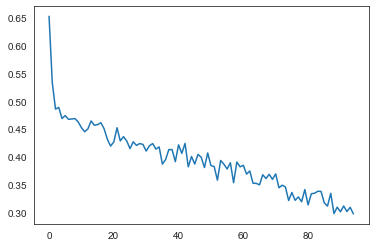

In [140]:
# plot losses
plt.plot(clf2.history['loss'])

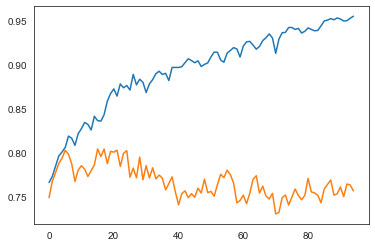

In [141]:
# plot auc
plt.plot(clf2.history['train_auc'])
plt.plot(clf2.history['valid_auc'])

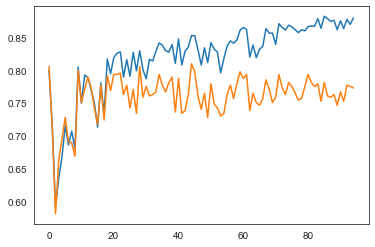

In [142]:
# plot auc
plt.plot(clf2.history['train_accuracy'])
plt.plot(clf2.history['valid_accuracy'])

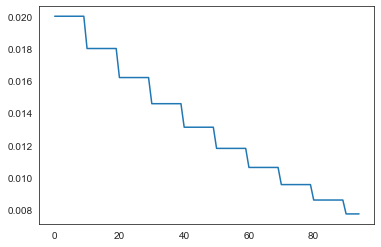

In [144]:
# plot learning rates
plt.plot(clf2.history['lr'])

In [145]:
preds = clf2.predict_proba(x_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)


preds_valid = clf2.predict_proba(x_val)
valid_auc = roc_auc_score(y_score=preds_valid[:,1], y_true=y_val)

print(f"BEST VALID SCORE FOR THIS DATASET : {clf2.best_cost}")
print(f"FINAL TEST SCORE FOR THIS DATASET : {test_auc}")

BEST VALID SCORE FOR THIS DATASET : 0.8098159509202454
FINAL TEST SCORE FOR THIS DATASET : 0.7844391153743673


In [160]:
preds = clf2.predict(x_test)
test_acc = accuracy_score(preds, y_test)


preds_valid = clf2.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

BEST ACCURACY SCORE ON VALIDATION SET : 0.8098159509202454
BEST ACCURACY SCORE ON TEST SET : 0.789795918367347


In [146]:
clf2.feature_importances_

array([6.66540299e-03, 1.10643632e-01, 2.53662704e-02, 6.34960812e-02,
       2.43257936e-02, 7.10324597e-04, 4.34706993e-02, 7.63395676e-05,
       4.52318972e-07, 2.57438152e-02, 0.00000000e+00, 0.00000000e+00,
       2.82767767e-03, 4.75498125e-01, 8.73588859e-02, 2.84611834e-02,
       3.55743867e-06, 8.32668027e-02, 2.14661568e-02, 6.18800566e-04])

In [147]:
explain_matrix, masks = clf2.explain(x_test)

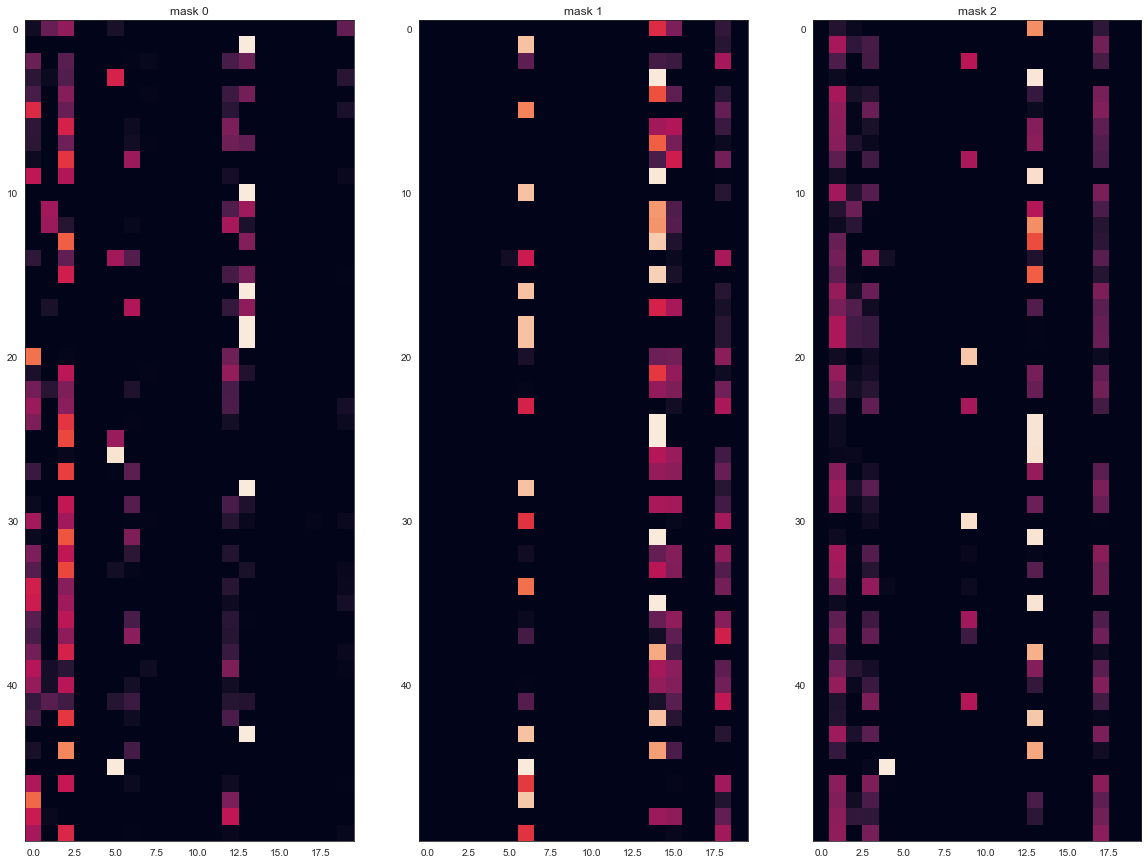

In [148]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

In [149]:
confusion_matrix(y_test, y_pred)

array([[337,  14],
       [ 75,  64]], dtype=int64)

In [102]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(max_depth=8,
    learning_rate=0.1,
    n_estimators=1000,
    verbosity=0,
    silent=None,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=-1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=0.7,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,)

clf_xgb.fit(x_train, y_train,
        eval_set=[(x_val, y_val)],
        early_stopping_rounds=40,
        verbose=10)

[0]	validation_0-error:0.29652
Will train until validation_0-error hasn't improved in 40 rounds.
[10]	validation_0-error:0.23108
[20]	validation_0-error:0.22290
[30]	validation_0-error:0.22290
[40]	validation_0-error:0.23313
[50]	validation_0-error:0.23517
Stopping. Best iteration:
[17]	validation_0-error:0.21677



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, silent=None, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=0)

In [103]:
preds = clf_xgb.predict(x_test)
test_acc = accuracy_score(preds, y_test)


preds_valid = clf_xgb.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

BEST ACCURACY SCORE ON VALIDATION SET : 0.7832310838445807
BEST ACCURACY SCORE ON TEST SET : 0.7326530612244898
